<a href="https://colab.research.google.com/github/fedjkeee/MTGScraper/blob/main/Challanges_scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import tqdm

In [2]:
pd.set_option('display.max_rows', 20)

In [4]:
#gdrive access
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#get all challanges from Lurrus ban (05/07/22 to )up to 06/22/2022
challenges_URL = 'https://www.mtggoldfish.com/tournament_searches/create?utf8=%E2%9C%93&tournament_search%5Bname%5D=Challenge+&tournament_search%5Bformat%5D=modern&tournament_search%5Bdate_range%5D=05%2F07%2F2022+-+06%2F21%2F2022&commit=Search'

In [ ]:
page = requests.get(challenges_URL)
soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
links = soup.select("a[href*=/tournament/]")
links

[<a href="/tournament/39756">Modern Challenge #12429716</a>,
 <a href="/tournament/39700">Modern Challenge #12426397</a>,
 <a href="/tournament/39690">Modern Challenge #12426323</a>,
 <a href="/tournament/39633">Modern Challenge #12424545</a>,
 <a href="/tournament/39624">Modern Challenge #12424539</a>,
 <a href="/tournament/39572">Modern Challenge #12422668</a>,
 <a href="/tournament/39565">Modern Challenge #12422662</a>,
 <a href="/tournament/39509">Modern Challenge #12420451</a>,
 <a href="/tournament/39501">Modern Challenge #12420445</a>,
 <a href="/tournament/39441">Modern Challenge #12418754</a>,
 <a href="/tournament/39434">Modern Challenge #12418748</a>,
 <a href="/tournament/39387">Modern Challenge #12416822</a>,
 <a href="/tournament/39380">Modern Challenge #12417153</a>]

In [ ]:
challenges_urls = []
for challenge in links:
  challenges_urls.append('http://mtggoldfish.com'+challenge['href'])
challenges_urls

['http://mtggoldfish.com/tournament/39756',
 'http://mtggoldfish.com/tournament/39700',
 'http://mtggoldfish.com/tournament/39690',
 'http://mtggoldfish.com/tournament/39633',
 'http://mtggoldfish.com/tournament/39624',
 'http://mtggoldfish.com/tournament/39572',
 'http://mtggoldfish.com/tournament/39565',
 'http://mtggoldfish.com/tournament/39509',
 'http://mtggoldfish.com/tournament/39501',
 'http://mtggoldfish.com/tournament/39441',
 'http://mtggoldfish.com/tournament/39434',
 'http://mtggoldfish.com/tournament/39387',
 'http://mtggoldfish.com/tournament/39380']

In [ ]:
def get_top32(URL, save= False , folder=""):
  '''
  'Save' is an option to save all decklists into individual .txt files to target folder 
  '''
  page = requests.get(URL)
  soup = BeautifulSoup(page.content, 'html.parser') 
  top32 = soup.find_all('a',class_='deck-slideshow-link')
  decks = []
  for node in soup.find_all(text=lambda x: x and "Date:" in x):
    date= node.split(":")[1].split('\n')[0]
  for record,i in tqdm.tqdm(zip(top32,range(len(top32))), leave=False): 
    URL_deck = 'https://www.mtggoldfish.com/deck/download/'+record.text
    page = requests.get(URL_deck)
    soup = BeautifulSoup(page.content, 'html.parser') 
    decks.append([record.text,record['title'].split(" - ")[0],record['title'].split(" - ")[1],record['href'],soup,i+1,date])
    if save:
      filename = record['title'].split(" - ")[0]+'_'+record['title'].split(" - ")[1]+'_'+record.text+'_'+date+'.txt'
      filepath=folder+filename
      with open(filepath, 'w') as f:
          f.writelines(soup)
  return decks

In [ ]:
all_decks=pd.DataFrame(columns=['id','Type','Player','href','decklist','record','date'])
for tournament_url in tqdm.tqdm(challenges_urls, leave=False, position=0):
  all_decks = all_decks.append(pd.DataFrame(get_top32(tournament_url,save=True,folder='/content/drive/MyDrive/mtg/decks/challenge/'), columns=['id','Type','Player','href','decklist','record','date']))

  0%|          | 0/13 [00:00<?, ?it/s]
0it [00:00, ?it/s]
1it [00:04,  4.88s/it]
2it [00:05,  2.46s/it]
3it [00:06,  1.67s/it]
4it [00:07,  1.30s/it]
5it [00:07,  1.12s/it]
6it [00:08,  1.00it/s]
7it [00:09,  1.11it/s]
8it [00:10,  1.18it/s]
9it [00:10,  1.20it/s]
10it [00:11,  1.25it/s]
11it [00:12,  1.32it/s]
12it [00:13,  1.30it/s]
13it [00:13,  1.36it/s]
14it [00:14,  1.43it/s]
15it [00:15,  1.43it/s]
16it [00:15,  1.45it/s]
17it [00:16,  1.40it/s]
18it [00:17,  1.44it/s]
19it [00:17,  1.44it/s]
20it [00:18,  1.42it/s]
21it [00:19,  1.43it/s]
22it [00:19,  1.47it/s]
23it [00:20,  1.46it/s]
24it [00:21,  1.49it/s]
25it [00:21,  1.50it/s]
26it [00:23,  1.11it/s]
27it [00:23,  1.23it/s]
28it [00:24,  1.29it/s]
29it [00:25,  1.34it/s]
30it [00:26,  1.36it/s]
31it [00:26,  1.38it/s]
32it [00:27,  1.34it/s]
  8%|▊         | 1/13 [00:28<05:44, 28.72s/it]
0it [00:00, ?it/s]
1it [00:00,  1.33it/s]
2it [00:01,  1.13it/s]
3it [00:02,  1.22it/s]
4it [00:03,  1.33it/s]
5it [00:03,  1.36it/s]
6i

In [ ]:
'''
If there are many requests, goldfish could throttle respones.
Let's check last parsed decklists
'''
all_decks.tail(5)

,id,Type,Player,href,decklist,record,date
27,4805411,Yawgmoth,DemonicTutors,/deck/visual/4805411?fullscreen=true,[4 Birds of Paradise\r\n1 Blood Artist\r\n2 Bl...,28,2022-05-07
28,4805412,Murktide Regent,iloveyou,/deck/visual/4805412?fullscreen=true,[3 Archmage's Charm\r\n1 Brazen Borrower\r\n4 ...,29,2022-05-07
29,4805413,Dimir Control,BomattCourier,/deck/visual/4805413?fullscreen=true,[4 Archmage's Charm\r\n4 Archon of Cruelty\r\n...,30,2022-05-07
30,4805414,Elementals,Kaijimmy,/deck/visual/4805414?fullscreen=true,"[2 Boseiju, Who Endures\r\n1 Breeding Pool\r\n...",31,2022-05-07
31,4805415,Murktide Regent,Kuhb,/deck/visual/4805415?fullscreen=true,[2 Archmage's Charm\r\n1 Brazen Borrower\r\n4 ...,32,2022-05-07


In [6]:
all_decks.to_csv('/content/drive/MyDrive/mtg/decks/challenge/all_deck_post_lurrus_ban.csv', encoding= 'UTF8')

### Load saved data

In [5]:
all_decks = pd.read_csv('/content/drive/MyDrive/mtg/decks/challenge/all_deck_post_lurrus_ban.csv')

In [7]:
all_decks = pd.read_csv('https://raw.githubusercontent.com/fedjkeee/MTGScraper/main/all_deck_post_lurrus_ban.csv')

In [8]:
all_decks.head()

,Unnamed: 0,id,Type,Player,href,decklist,record,date
0,0,4896460,Murktide Regent,O_danielakos,/deck/visual/4896460?fullscreen=true,3 Archmage's Charm\r\n4 Consider\r\n4 Counters...,1,2022-06-19
1,1,4896461,RG,YungDingo,/deck/visual/4896461?fullscreen=true,2 Arid Mesa\r\n2 Bloodstained Mire\r\n1 Boseij...,2,2022-06-19
2,2,4896462,Grixis Death's Shadow,Shadowz2005,/deck/visual/4896462?fullscreen=true,2 Blood Crypt\r\n4 Bloodstained Mire\r\n4 Deat...,3,2022-06-19
3,3,4896463,Prison Tron,susurrus_mtg,/deck/visual/4896463?fullscreen=true,1 Basilisk Collar\r\n1 Blast Zone\r\n4 Chalice...,4,2022-06-19
4,4,4896464,4c Blink,12azor,/deck/visual/4896464?fullscreen=true,"4 Abundant Growth\r\n1 Boseiju, Who Endures\r\...",5,2022-06-19


In [9]:
#top 15 decks from top32 decklists
all_decks.Type.value_counts()[:15]

Murktide Regent          53
Elementals               49
Hammer Time              28
4c Blink                 23
4c Living End            23
Yawgmoth                 23
Crashing Footfalls       19
Burn                     18
Affinity                 17
Amulet Titan             15
Grixis Death's Shadow    13
Izzet Control            10
Mono-Green Tron           8
Asmo Food                 7
Jund                      7
Name: Type, dtype: int64

In [10]:
#top 15 decks from top16 decklists
all_decks.loc[all_decks['record'] < 17].Type.value_counts()[:15]

Murktide Regent          28
Elementals               25
Hammer Time              14
4c Blink                 14
4c Living End            13
Amulet Titan             10
Crashing Footfalls       10
Izzet Control             8
Grixis Death's Shadow     7
Yawgmoth                  7
Affinity                  7
Burn                      6
Azorius Control           6
4c Omnath                 4
Asmo Food                 4
Name: Type, dtype: int64

In [11]:
#top 15 decks from top8 decklists
all_decks.loc[all_decks['record'] < 9].Type.value_counts()[:15]

Murktide Regent          13
Elementals               10
4c Living End             9
4c Blink                  8
Hammer Time               7
Crashing Footfalls        5
Grixis Death's Shadow     4
Burn                      4
Izzet Control             4
Amulet Titan              4
Affinity                  4
Yawgmoth                  4
Mono-Green Tron           3
Jeskai Control            2
Belcher                   2
Name: Type, dtype: int64

In [12]:
#Unique archetypes
archetypes = all_decks.Type.unique()
print(archetypes)

['Murktide Regent' 'RG' "Grixis Death's Shadow" 'Prison Tron' '4c Blink'
 'Burn' '4c Living End' 'Jund' 'Azorius Control' 'Izzet Control'
 'Azorius Blink' 'Dimir Mill' 'Hammer Time' 'Glimpse Combo' 'Yawgmoth'
 'UBR' 'Mono-Green Hardened Scales' 'Crashing Footfalls' 'Elementals'
 '4c Omnath' 'Amulet Titan' 'Mono-Green Tron' 'Rakdos Midrange' '5c Blink'
 'Affinity' '4c Tameshi Combo' 'Mono-Black Coffers' '5c Omnath' 'Belcher'
 'The Rock' 'Grixis Midrange' 'Simic Tron' 'Calibrated Blast' 'Asmo Food'
 'Boros Midrange' 'Indomitable Creativity' 'Bogles' 'WUBRG' 'WURG'
 'Mono-Blue Tron' 'Jeskai Control' 'Grinding Station' 'Ad Nauseam'
 'Dimir Control' 'WUBR' 'Phoenix' 'Dredge' 'Eldrazi Tron' 'Thopter Combo'
 'Death & Taxes' 'Abzan Stoneblade' 'Selesnya Hardened Scales'
 'Titan Shift' 'WRG' 'Crab Vine' 'Gruul Midrange' 'Jeskai Stoneblade'
 'Naya Midrange' 'Izzet Prowess' 'Selesnya Lifegain' 'Saheeli Combo']


In [13]:
#archetype count
len(archetypes)

61

In [14]:
all_decks.loc[all_decks['record'] < 9].Type.value_counts()

Murktide Regent       13
Elementals            10
4c Living End          9
4c Blink               8
Hammer Time            7
                      ..
5c Omnath              1
Calibrated Blast       1
Glimpse Combo          1
Mono-Black Coffers     1
4c Tameshi Combo       1
Name: Type, Length: 33, dtype: int64

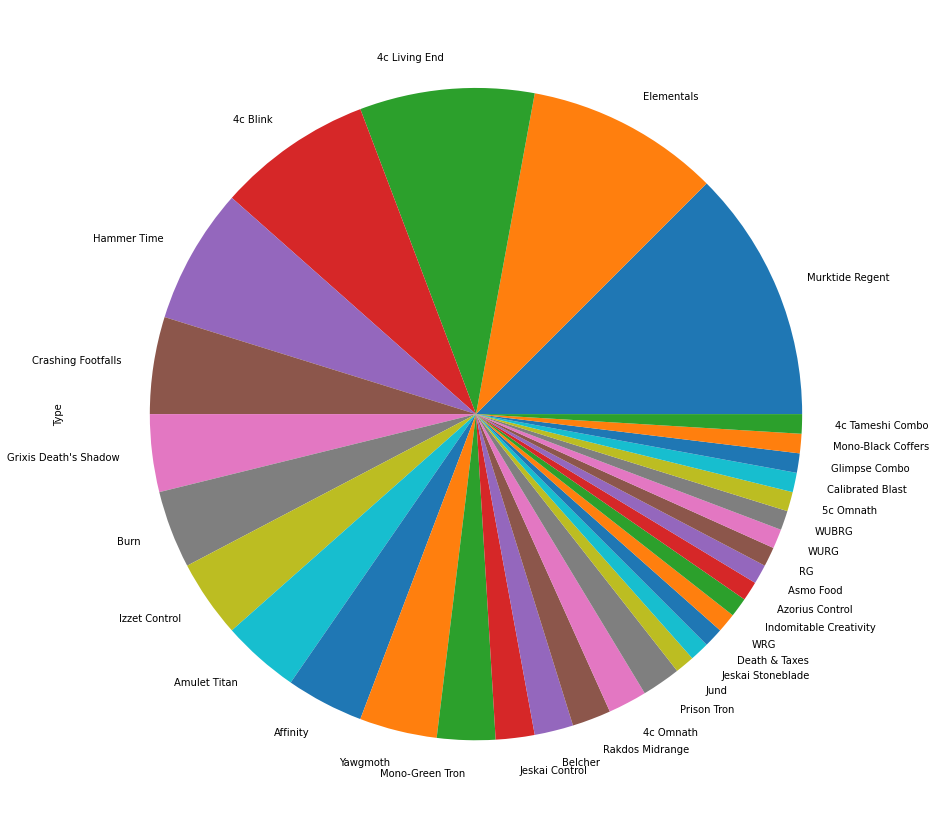

In [15]:
all_decks.loc[all_decks['record'] < 9].Type.value_counts().plot(kind='pie',figsize=(15, 15))

In [16]:
#top32 -> top8 conversion
conversion = []
for archetype in archetypes:
  conv = all_decks.loc[(all_decks.Type == archetype) & (all_decks.record < 9)].count()[0]/all_decks.loc[all_decks.Type == archetype].count()[0]
  conversion.append([archetype,conv,all_decks.loc[all_decks.Type == archetype].count()[0]])

In [17]:
conversion_df =pd.DataFrame(conversion, columns=["Type","Conversion","t32count"])

In [18]:
#best conversion, if there are more than 5 decks in all decklists
conversion_df.loc[conversion_df["t32count"] > 5].sort_values(by=["Conversion"], ascending=False)[:15]

,Type,Conversion,t32count
9,Izzet Control,0.400000,10
6,4c Living End,0.391304,23
21,Mono-Green Tron,0.375000,8
4,4c Blink,0.347826,23
19,4c Omnath,0.333333,6
2,Grixis Death's Shadow,0.307692,13
20,Amulet Titan,0.266667,15
17,Crashing Footfalls,0.263158,19
12,Hammer Time,0.250000,28
0,Murktide Regent,0.245283,53


### Cards

In [19]:
'''
main and side are sperated by empty line
'''
all_decklists_cards=[]
for decklist in all_decks.decklist:
  main = True
  for line in decklist.split("\r\n"):
    if main and line !='':
      line = line.split(" ",1)
      line.append(main)
      all_decklists_cards.append(line)
    elif line == '':
      main = False
    else:
      line = line.split(" ",1)
      line.append(main)
      all_decklists_cards.append(line)

In [20]:
all_decklists_cards

[['3', "Archmage's Charm", True],
 ['4', 'Consider', True],
 ['4', 'Counterspell', True],
 ['4', "Dragon's Rage Channeler", True],
 ['1', 'Dress Down', True],
 ['4', 'Expressive Iteration', True],
 ['1', 'Fiery Islet', True],
 ['4', 'Lightning Bolt', True],
 ['4', "Mishra's Bauble", True],
 ['2', 'Misty Rainforest', True],
 ['4', 'Murktide Regent', True],
 ['1', 'Otawara, Soaring City', True],
 ['2', 'Polluted Delta', True],
 ['4', 'Ragavan, Nimble Pilferer', True],
 ['2', 'Scalding Tarn', True],
 ['3', 'Snow-Covered Island', True],
 ['2', 'Spell Pierce', True],
 ['4', 'Spirebluff Canal', True],
 ['3', 'Steam Vents', True],
 ['4', 'Unholy Heat', True],
 ['1', 'Abrade', False],
 ['1', 'Blood Moon', False],
 ['1', 'Dress Down', False],
 ['2', 'Engineered Explosives', False],
 ['1', 'Flusterstorm', False],
 ['1', 'Fury', False],
 ['1', 'Jace, the Mind Sculptor', False],
 ['1', 'Magus of the Moon', False],
 ['2', 'Mystical Dispute', False],
 ['1', 'Subtlety', False],
 ['1', "Tormod's Crypt

In [21]:
#all cards DF
all_decklists_cards_df =pd.DataFrame(all_decklists_cards,columns =['count','card','main'])

In [22]:
all_main_cards = all_decklists_cards_df[all_decklists_cards_df.main]
all_side_cards = all_decklists_cards_df[~all_decklists_cards_df.main]

### ALL MTG PRINTINGS

In [24]:
''' MTGJSON card database, https://github.com/fedjkeee/MTGScraper/blob/main/cards.zip '''
mtg= pd.read_csv('/content/drive/My Drive/mtg/cards.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10,16,19,23,26,50,62,63,70,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [25]:
mh2_cards = mtg.loc[(mtg['setCode'] == 'MH2') & (mtg['type'] != 'Land') & (mtg['supertypes'] != 'Basic')]
mh2_cards.drop_duplicates(subset=['name'], inplace=True)
mh2_cards.set_index('name',inplace=True)
mtg.drop_duplicates(subset=['name'], inplace=True)
mtg.set_index('name',inplace=True)
lands = mtg.loc[(mtg['type'].str.contains('Land')) | (mtg['supertypes'] == 'Basic')]

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [27]:
#separate maindeck cards and sideboard
all_main_cards['count'] = all_main_cards['count'].astype(int)
all_side_cards['count'] = all_side_cards['count'].astype(int)
all_decklists_cards_df['count'] = all_decklists_cards_df['count'].astype(int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
all_cards_count = all_decklists_cards_df.groupby(['card'])['card','count'].agg('sum')
all_cards_count.sort_values(by=['count'],ascending=False)[:20]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,count
card,
Misty Rainforest,670
Endurance,544
Lightning Bolt,523
Flooded Strand,490
"Teferi, Time Raveler",462
Expressive Iteration,461
"Ragavan, Nimble Pilferer",446
Unholy Heat,439
Prismatic Ending,437


In [29]:
#most used MH2 cards 
all_cards_count.loc[all_cards_count.index.isin(mh2_cards.index)].sort_values(by=['count'],ascending=False)[:20]

,count
card,
Endurance,544
"Ragavan, Nimble Pilferer",446
Unholy Heat,439
Prismatic Ending,437
Counterspell,399
Fury,390
Solitude,367
Urza's Saga,351
Dragon's Rage Channeler,244


In [30]:
#most used non-MH2 cards
all_cards_count.loc[~(all_cards_count.index.isin(mh2_cards.index)) & ~(all_cards_count.index.isin(lands.index))].sort_values(by=['count'],ascending=False)[:20]

,count
card,
Lightning Bolt,523
"Teferi, Time Raveler",462
Expressive Iteration,461
Wrenn and Six,396
Mishra's Bauble,387
Mystical Dispute,371
"Omnath, Locus of Creation",347
Force of Vigor,294
Abundant Growth,286


### main \ side cards

In [31]:
all_main_cards_count = all_main_cards.groupby(['card'])['card','count'].agg('sum')
all_main_cards_count.loc[~(all_main_cards_count.index.isin(lands.index))].sort_values(by=['count'],ascending=False)[:20]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,count
card,
Lightning Bolt,517
Expressive Iteration,461
"Ragavan, Nimble Pilferer",446
Unholy Heat,438
"Teferi, Time Raveler",411
Counterspell,399
Wrenn and Six,396
Prismatic Ending,391
Mishra's Bauble,387


In [32]:
all_side_cards_count = all_side_cards.groupby(['card'])['card','count'].agg('sum')
all_side_cards_count.sort_values(by=['count'],ascending=False)[:20]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,count
card,
Mystical Dispute,359
Endurance,342
Force of Vigor,294
Veil of Summer,245
Engineered Explosives,228
Flusterstorm,210
Subtlety,193
Chalice of the Void,188
Dress Down,160


### decks with\without MH2

In [33]:
def mh2_in_decklist(decklist):
  mh2_check = False
  for line in decklist.split("\r\n"):
    if line != '':
      line = line.split(" ",1) 
      if line[1] in mh2_cards.index:
        mh2_check = True
  return mh2_check

In [34]:
all_decks['MH2indeck'] = all_decks['decklist'].apply(lambda x : mh2_in_decklist(x))

In [35]:
#decks without mh2 cards
all_decks.loc[all_decks['MH2indeck'] == False]['Type']

80      Mono-Green Tron
92      Mono-Green Tron
113                  RG
125                Burn
202      Mono-Blue Tron
243              Dredge
273     Mono-Green Tron
306    4c Tameshi Combo
324     Mono-Green Tron
337        Eldrazi Tron
349     Mono-Green Tron
377                Burn
386    4c Tameshi Combo
396                  RG
403              Dredge
409                Burn
Name: Type, dtype: object

In [36]:
#top players
all_decks.Player.value_counts()[:15]

DemonicTutors    10
HappySandwich     7
SoulStrong        7
Do0mSwitch        7
BigBaranoia       5
Laplasjan         5
Xerk              5
YungDingo         4
_Batutinha_       4
patheus_84        4
bobthedog         4
O_danielakos      4
kanister          4
TheBigMoke        3
Rulleboren        3
Name: Player, dtype: int64

In [37]:
def nonland_in_decklist(decklist):
  n=0
  for line in decklist.split("\r\n"):
    if line != '':
      line = line.split(" ",1) 
      if (line[1] not in lands.index):
        n+=int(line[0])
  return n

In [38]:
def mh2_count_decklist(decklist):
  n=0
  for line in decklist.split("\r\n"):
    if line != '':
      line = line.split(" ",1) 
      if line[1] in mh2_cards.index:
        n+=int(line[0])
  return n

In [39]:
all_decks['nonlandcards'] = all_decks['decklist'].apply(lambda x : nonland_in_decklist(x))

In [40]:
all_decks['mh2_count'] = all_decks['decklist'].apply(lambda x : mh2_count_decklist(x))

In [41]:
all_decks.head()

,Unnamed: 0,id,Type,Player,href,decklist,record,date,MH2indeck,nonlandcards,mh2_count
0,0,4896460,Murktide Regent,O_danielakos,/deck/visual/4896460?fullscreen=true,3 Archmage's Charm\r\n4 Consider\r\n4 Counters...,1,2022-06-19,True,57,24
1,1,4896461,RG,YungDingo,/deck/visual/4896461?fullscreen=true,2 Arid Mesa\r\n2 Bloodstained Mire\r\n1 Boseij...,2,2022-06-19,True,46,1
2,2,4896462,Grixis Death's Shadow,Shadowz2005,/deck/visual/4896462?fullscreen=true,2 Blood Crypt\r\n4 Bloodstained Mire\r\n4 Deat...,3,2022-06-19,True,55,15
3,3,4896463,Prison Tron,susurrus_mtg,/deck/visual/4896463?fullscreen=true,1 Basilisk Collar\r\n1 Blast Zone\r\n4 Chalice...,4,2022-06-19,True,53,4
4,4,4896464,4c Blink,12azor,/deck/visual/4896464?fullscreen=true,"4 Abundant Growth\r\n1 Boseiju, Who Endures\r\...",5,2022-06-19,True,63,24


In [ ]:
all_decks.sort_values(by=['mh2_count'],ascending=False)[:20]

,Unnamed: 0,id,Type,Player,href,decklist,record,date,MH2indeck,nonlandcards,mh2_count
20,20,4896480,Glimpse Combo,Xenowan,/deck/visual/4896480?fullscreen=true,4 Cavern of Souls\r\n4 Endurance\r\n4 Fable of...,21,2022-06-19,True,48,26
133,5,4865735,Glimpse Combo,Xenowan,/deck/visual/4865735?fullscreen=true,4 Cavern of Souls\r\n4 Endurance\r\n4 Fable of...,6,2022-06-04,True,50,26
283,27,4833845,Elementals,Danny_Bambino,/deck/visual/4833845?fullscreen=true,"4 Abundant Growth\r\n2 Boseiju, Who Endures\r\...",28,2022-05-21,True,65,25
167,7,4850220,Murktide Regent,boytriton,/deck/visual/4850220?fullscreen=true,2 Blood Moon\r\n4 Consider\r\n4 Counterspell\r...,8,2022-05-29,True,56,25
358,6,4806006,Murktide Regent,JUJUBEAN__2004,/deck/visual/4806006?fullscreen=true,3 Archmage's Charm\r\n4 Consider\r\n4 Counters...,7,2022-05-08,True,56,25
353,1,4806001,Murktide Regent,sokos13,/deck/visual/4806001?fullscreen=true,3 Archmage's Charm\r\n1 Brazen Borrower\r\n4 C...,2,2022-05-08,True,56,25
341,21,4818598,Murktide Regent,Misplacedginger,/deck/visual/4818598?fullscreen=true,3 Archmage's Charm\r\n4 Consider\r\n4 Counters...,22,2022-05-14,True,56,25
307,19,4820230,Murktide Regent,boytriton,/deck/visual/4820230?fullscreen=true,2 Archmage's Charm\r\n4 Consider\r\n4 Counters...,20,2022-05-15,True,57,25
142,14,4865744,4c Omnath,xl_snapcaster,/deck/visual/4865744?fullscreen=true,"4 Abundant Growth\r\n2 Boseiju, Who Endures\r\...",15,2022-06-04,True,63,25
278,22,4833840,Elementals,MTG_Vince,/deck/visual/4833840?fullscreen=true,"4 Abundant Growth\r\n2 Boseiju, Who Endures\r\...",23,2022-05-21,True,65,25


In [42]:
mh2_decks = all_decks.groupby(by=['Type'])['Type','mh2_count'].agg('mean')
mh2_decks.sort_values(by=['mh2_count'], ascending=False)[:20]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,mh2_count
Type,
Murktide Regent,22.773585
Glimpse Combo,22.250000
Boros Midrange,21.000000
Abzan Stoneblade,21.000000
4c Omnath,20.833333
Asmo Food,20.571429
WUBR,20.000000
Thopter Combo,19.000000
4c Blink,19.000000
